In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

from plotly.subplots import make_subplots

In [116]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [4]:
df_users = pd.read_csv("[뱅크샐러드] DS 사전과제 Dataset/df_users.csv")
df_user_visits = pd.read_csv("[뱅크샐러드] DS 사전과제 Dataset/df_user_visits.csv")

In [5]:
df_users.describe().T.join(pd.DataFrame(df_users.dtypes)).rename(columns={0:"dtypes"})

,count,unique,top,freq,dtypes
user_uuid,328473,328473,00b490a4421320e41162cc815361b1b5,1,object
carrier,328473,3,초록,147724,object
group,328473,2,group_1,223634,object
app_version_joined,328473,2,spencer,186944,object
date_joined,328473,108,2030-04-30,33095,object


In [6]:
df_user_visits.describe().T.join(pd.DataFrame(df_user_visits.dtypes)).rename(columns={0:"dtypes"})

,count,mean,std,min,25%,50%,75%,max,dtypes
visits,328473.0,9.113821,9.509663,0.000000,2.000000,6.000000,13.000000,116.000000,int64
sum_time_to_interactive,328473.0,36.384233,52.988051,0.000000,5.850964,18.137140,45.339411,1190.792778,float64
avg_time_to_interactive,298806.0,3.998612,2.827580,0.004151,1.921255,3.351198,5.385305,29.468102,float64


# Feature engineering

In [7]:
df_users["date_joined"] = pd.to_datetime(df_users["date_joined"])
df_user_visits["avg_time_to_interactive"] = df_user_visits["avg_time_to_interactive"].fillna(0)

In [ ]:
joined_df = pd.merge(df_users, df_user_visits, left_on="user_uuid", right_on="user_uuid")

joined_df["year_month_joined"]= joined_df["date_joined"].dt.to_period("M")
joined_df["dayofweek_joined"] = joined_df["date_joined"].dt.dayofweek # monday = 0 

joined_df.set_index("date_joined", inplace=True)
joined_df.sort_index(inplace=True)

group_1 의 모든 사용자의 방문횟수가 group_2보다 2배정도 많은데 애초에 사용자수가 2배 많음.
- 인당 평균 방문수는 비슷.
- visit 0 인 사람도 대략 group_1 = 2group_2, 그룹 사이즈의 차이로 보임. -> 어느 한 그룹이 visit 0 의 영향이 없음.

# 사용자 그룹 간 앱 방문 비교 분석

## group_1 과 group_2 의 사용자 방문 수의 차이가 있는지 검증

In [ ]:
joined_df.groupby(["group"]).agg({
    "visits":{"count", sum, np.mean,np.median, np.std, min, max},
    "avg_time_to_interactive":{np.mean, np.median, np.std, min, max}
})

아래 Histogram 을 보면 그륩별 방문 수 분포는 비슷한 shape 을 그리고 있습니다.

In [ ]:
group1 = joined_df.loc[joined_df["group"] == "group_1"].copy()
group2 = joined_df.loc[joined_df["group"] == "group_2"].copy()

fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=["group1", "group2"]    
)

fig.add_trace(
    go.Histogram(
        name = "group1",
        x = group1["visits"]
    ), row=1, col=1
)
fig.add_trace(
    go.Histogram(
        name = "group2",
        x = group2["visits"]
    ), row=2, col=1
)

fig.update_layout(
    title = "group 별 방문 수 분포"
)
fig.show()

In [ ]:
group1_sample = group1.sample(100)
group2_sample = group2.sample(100)

In [ ]:
print(f"group1_sample mean    = {group1_sample['visits'].mean()}")
print(f"group1_sample std_dev = {group1_sample['visits'].std()}")

In [ ]:
print(f"group2_sample mean    = {group2_sample['visits'].mean()}")
print(f"group2_sample std_dev = {group2_sample['visits'].std()}")

## 그룹별 통신사별 방문 수 차이

group1 과 group2의 사용자 방문 수의 차이가 통신사 별로 다른지? -> ex: A 통신사를 쓰는 group1는 A통신사를 쓰는 grouop2 사용자보다 방문 수가 많은가?

In [ ]:
joined_df.groupby(["carrier", "group"]).agg({
    "visits":{"count", sum, np.mean, np.std, min, max},
    "avg_time_to_interactive":{np.mean, np.median, np.std, min, max}
})

### 그룹별 통신사별 방문 수 분포

In [ ]:
carriers = ["노랑", "보라", "초록"]
groups   = ["group_1", "group_2"]

df_dict = {}
for carrier in carriers:
    for group in groups:
        df = joined_df.loc[(joined_df["carrier"] == carrier) &
                           (joined_df["group"] == group)].copy()
        df_dict[carrier +"_"+ group] = df

In [ ]:
fig = make_subplots(
    rows=3, 
    cols=2,
    subplot_titles=list(df_dict.keys())
)

for idx, (name, df) in enumerate(df_dict.items()):
    fig.add_trace(
        go.Histogram(
            name = name,
            x = df["visits"]
        ),
        row=(idx//2)+1, col= (idx%2)+1
    )
    fig.update_xaxes(range=[0,100])
    
fig.update_layout(
    title = "통신사별_group별 방문 수 분포"
)

fig.show()

### 가설검증

In [ ]:
# def TestDifference(carrier_name, n, c, g1, g2):
    

In [ ]:
# for carrier in ["노랑", "보라", "초록"]:
#     carrier_df = joined_df.loc[joined_df["carrier"] == carrier].copy()
    
#     g1 = carrier_df.loc[carrier_df["group"] == "group_1"].sample(100).copy()
#     g2 = carrier_df.loc[carrier_df["group"] == "group_2"].sample(100).copy()
    
#     TestDifference(n, 0.)

In [ ]:
n = 100

for name, df in df_dict.items():
    sample = df.sample(100)
    print(f"{name} mean    = {sample['visits'].mean()}")
    print(f"{name} std_dev = {sample['visits'].std()}")
    print("")

# 방문 수 분석 및 예측

## 다른 정보들과의 관계

In [ ]:
joined_df.head()

아래 pairplot 을 보면 2가지를 알수 있습니다.
1. 평균 앱 로딩 타임이 길어지면 visit 숫자가 줄어듭니다. 하지만 아주 약한 관계 -0.002
2. 총 앱 로딩 타임이 길어지면 평균 앱 로딩 타임도 길어집니다. -> 많이 방문하면 총 로딩 타임이 길어질것, 많이 방문하면 그만큼 서버장애나 다른이유요 인해 엄청 오래걸리때가 걸릴수 있음=> 평균을 높임(예상).

총 가입자수가 늘면서 앱로딩 시간이 길어지는지 보자. 그렇타면:
- 초반에만 사용한 사람들은 방문 수가 적을것 + 가입자가 적은 초반에는 로딩시간이 빨라서 평균로딩시간이 짧음
- 초반 ~ 현재까지 사용한 사람들은 방문수가 높을것 + 가입자수가 늘면서 평균로딩 시간도 오름/

문제: 초반에 가입했더라도 후반에만 사용했을수도 있다... 언제 사용했는지의 데이터가 없어서 불가능.

앱버젼별로 보면됨. --> 앱버젼도 평균 앱로딩 시간에 영향을 미치지않음.

In [84]:
joined_df.groupby(["app_version_joined"]).agg({
    "user_uuid":"count",
    "visits":{"mean", "sum"},
    "avg_time_to_interactive":{"mean", np.std, np.median}
})

user_uuid   visits           avg_time_to_interactive  \
                       count      sum      mean                     std   
app_version_joined                                                        
kelly                 141529  1278338  9.032340                2.935303   
spencer               186944  1715306  9.175507                2.926247   

                                        
                        mean    median  
app_version_joined                      
kelly               3.601319  3.007713  
spencer             3.664832  3.068480

In [85]:
joined_df.groupby(["year_month_joined"]).agg({
    "user_uuid":"count",
    "visits":{"mean", "sum"},
    "avg_time_to_interactive":"mean"
})

user_uuid   visits           avg_time_to_interactive
                      count      sum      mean                    mean
year_month_joined                                                     
2029-12                   3       16  5.333333                4.001343
2030-01                  30      210  7.000000                4.687666
2030-02                 502     4843  9.647410                3.791061
2030-03               13433   121719  9.061193                3.670151
2030-04              314505  2866856  9.115454                3.635721

In [86]:
joined_df.corr()

,visits,sum_time_to_interactive,avg_time_to_interactive,dayofweek_joined
visits,1.000000,0.713953,0.116019,0.000512
sum_time_to_interactive,0.713953,1.000000,0.550946,-0.000013
avg_time_to_interactive,0.116019,0.550946,1.000000,-0.000304
dayofweek_joined,0.000512,-0.000013,-0.000304,1.000000


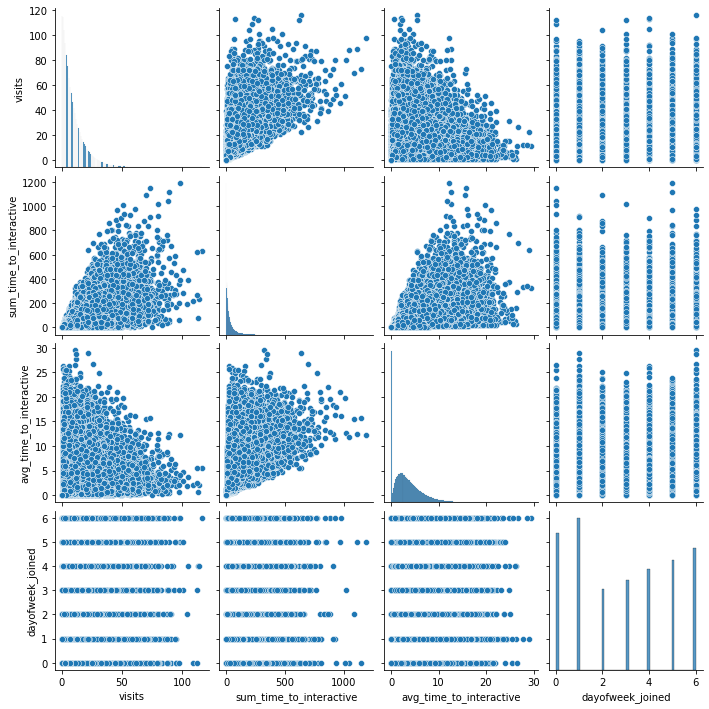

In [87]:
sns.pairplot(joined_df, kind="scatter")
plt.show()

---

시간적으로 봤을때 두 그륩이 다른지 확인 -> ex: group_1 은 1월에 대부분 가입, group_2 는 3~4월에?
    - 두그룹 둘다 가입자수가 그륩의 비율에 동일하게 증가. -> group_1가입자 = 2group_2가입자.

In [88]:
# fig = go.Figure()

# fig.add_trace(
#     go.Histogram(
#         name = "group1",
#         x= joined_df.loc[joined_df["group"] == "group_1"]["year_month_joined"]
#     )
# )

# fig.add_trace(
#     go.Histogram(
#         name = "group2",
#         x= joined_df.loc[joined_df["group"] == "group_2"]["year_month_joined"]
#     )
# )

# fig.show()

----

categorical column 들과 방문 수의 관계

- 가입 년-월 
- 그룹
- 통신사
- 앱 버젼

가입 년-월 분류:
- 2030년 1월 < 3월 < 4월 < 2월 순으로 평균 방문 수.
- 2030년 1월은 2,3,4월에 비해 평균 방문수가 낮고 평균 앱로딩 시간도 깁니다. -> 추가로 평균 앱로딩시간이 평균 방문 수의 영향을 미치는지 인과관계 분석을 해봐도 될것.

In [89]:
joined_df.groupby(["year_month_joined"]).agg({
    "user_uuid":"count",
    "visits":{"mean", "sum"},
    "avg_time_to_interactive":"mean"
})

user_uuid   visits           avg_time_to_interactive
                      count      sum      mean                    mean
year_month_joined                                                     
2029-12                   3       16  5.333333                4.001343
2030-01                  30      210  7.000000                4.687666
2030-02                 502     4843  9.647410                3.791061
2030-03               13433   121719  9.061193                3.670151
2030-04              314505  2866856  9.115454                3.635721

<AxesSubplot:xlabel='year_month_joined', ylabel='visits'>

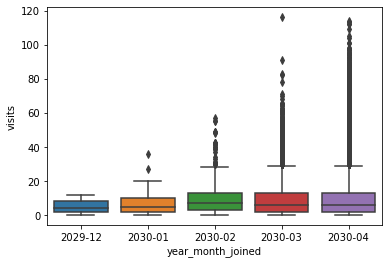

In [90]:
sns.boxplot(x=joined_df["year_month_joined"],
            y=joined_df["visits"],
            order=sorted(joined_df["year_month_joined"].unique()))

In [91]:
joined_df.groupby(["group"]).agg({
    "user_uuid":"count",
    "visits":{"mean", "sum"},
    "avg_time_to_interactive":"mean"
})

user_uuid   visits           avg_time_to_interactive
            count      sum      mean                    mean
group                                                       
group_1    223634  2038824  9.116789                3.639330
group_2    104839   954820  9.107489                3.633489

<AxesSubplot:xlabel='group', ylabel='visits'>

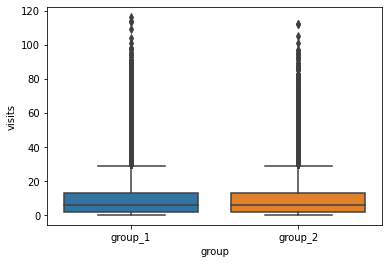

In [92]:
sns.boxplot(x=joined_df["group"],
            y=joined_df["visits"])

In [93]:
joined_df.groupby(["carrier"]).agg({
    "user_uuid":"count",
    "visits":{"mean", "sum"},
    "avg_time_to_interactive":"mean"
})

user_uuid   visits           avg_time_to_interactive
            count      sum      mean                    mean
carrier                                                     
노랑          98767   899939  9.111738                3.631548
보라          81982   747046  9.112317                3.635884
초록         147724  1346659  9.116047                3.642300

<AxesSubplot:xlabel='carrier', ylabel='visits'>

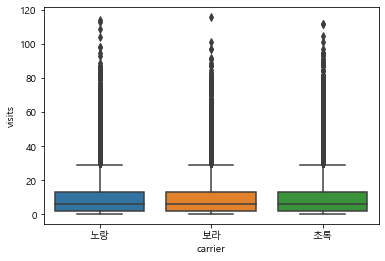

In [117]:
sns.boxplot(x=joined_df["carrier"],
            y=joined_df["visits"])

app_version_joined 분류:
- 가입한 버젼 별 평균 방문 수, 큰차이 없음.

In [95]:
joined_df.groupby(["app_version_joined"]).agg({
    "user_uuid":"count",
    "visits":{"mean", "sum"},
    "avg_time_to_interactive":"mean"
})

user_uuid   visits           avg_time_to_interactive
                       count      sum      mean                    mean
app_version_joined                                                     
kelly                 141529  1278338  9.032340                3.601319
spencer               186944  1715306  9.175507                3.664832

<AxesSubplot:xlabel='app_version_joined', ylabel='visits'>

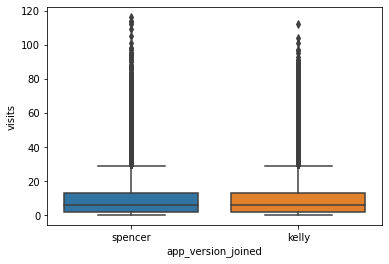

In [96]:
sns.boxplot(x=joined_df["app_version_joined"],
            y=joined_df["visits"])

## 방문 수 예측

### Linear Regression

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [114]:
joined_df = pd.merge(df_users, df_user_visits, left_on="user_uuid", right_on="user_uuid")

joined_df["year_month_joined"]= joined_df["date_joined"].dt.to_period("M")
joined_df["dayofweek_joined"] = joined_df["date_joined"].dt.dayofweek # monday = 0 

joined_df.set_index("date_joined", inplace=True)
joined_df.sort_index(inplace=True)

In [115]:
joined_df

,user_uuid,carrier,group,app_version_joined,visits,sum_time_to_interactive,avg_time_to_interactive,year_month_joined,dayofweek_joined
date_joined,,,,,,,,,
2029-12-28,150ad937cf8e7410ea1115e420070ff0,노랑,group_1,spencer,4,36.872369,9.218092,2029-12,4
2029-12-29,5cb4284c5d17a1df998bf23d893dc311,보라,group_1,kelly,0,0.000000,0.000000,2029-12,5
2029-12-31,afb74bfc47bff08dfe2fea7f1dab24d0,노랑,group_1,spencer,12,33.431243,2.785937,2029-12,0
2030-01-01,eb9973fa2a2645d2a1d7b1d68bb84f6d,초록,group_1,spencer,4,0.303953,0.075988,2030-01,1
2030-01-06,7395b7a220c1f5a8b6b239486d3937fb,보라,group_2,spencer,0,0.000000,0.000000,2030-01,6
...,...,...,...,...,...,...,...,...,...
2030-04-30,bf4b379bfac3e73df5ee452ba8069083,노랑,group_1,kelly,2,29.101243,14.550622,2030-04,1
2030-04-30,1a48b6d37d044301055917cac75e6201,노랑,group_1,kelly,0,0.000000,0.000000,2030-04,1
2030-04-30,96a9ead4164ee1e40b404c87de78b40e,노랑,group_1,kelly,22,49.144535,2.233843,2030-04,1


In [64]:
cat_cols = ["carrier", "group", "app_version_joined"] #"year", "month", "dayofweek_joined"
num_cols = ["sum_time_to_interactive", "avg_time_to_interactive"]

joined_df["year"] = joined_df["year_month_joined"].dt.year
joined_df["month"] = joined_df["year_month_joined"].dt.month
joined_df.drop(columns=["user_uuid", "year_month_joined"], inplace=True)

y = joined_df.pop("visits")
X = joined_df

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)

stdscaler = StandardScaler()
X_train[num_cols] = stdscaler.fit_transform(X_train[num_cols])

In [50]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [51]:
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True) # can we do this before splitting train_test?
X_test[num_cols] = stdscaler.transform(X_test[num_cols])

In [52]:
y_train_pred = lin_reg.predict(X_train)
y_pred = lin_reg.predict(X_test)

In [43]:
print("OHE month and year")
print(f"train MSE = {mean_squared_error(y_train, y_train_pred)}")
print(f"test MSE = {mean_squared_error(y_test, y_pred)}")

OHE month and year
train MSE = 34.277934679030714
test MSE = 34.504852460199686


In [53]:
print("Original")
print(f"train MSE = {mean_squared_error(y_train, y_train_pred)}")
print(f"test MSE = {mean_squared_error(y_test, y_pred)}")

Original
train MSE = 34.279813835369886
test MSE = 34.50485686183003


In [54]:
test_df = pd.concat([X_test, y_test], axis=1)
test_df["y_pred"] = y_pred

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=test_df.index,
        y=test_df["visits"],
        mode ="markers"
    )
)

fig.show()

### Regression Tree

In [119]:
joined_df = pd.merge(df_users, df_user_visits, left_on="user_uuid", right_on="user_uuid")

joined_df["year_month_joined"]= joined_df["date_joined"].dt.to_period("M")
joined_df["dayofweek_joined"] = joined_df["date_joined"].dt.dayofweek # monday = 0 

joined_df.set_index("date_joined", inplace=True)
joined_df.sort_index(inplace=True)

cat_cols = ["carrier", "group", "app_version_joined","year", "month", "dayofweek_joined"] #"year", "month", "dayofweek_joined"
num_cols = ["sum_time_to_interactive", "avg_time_to_interactive"]

joined_df["year"] = joined_df["year_month_joined"].dt.year
joined_df["month"] = joined_df["year_month_joined"].dt.month
joined_df.drop(columns=["user_uuid", "year_month_joined"], inplace=True)

y = joined_df.pop("visits")
X = joined_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)

stdscaler = StandardScaler()
X_train[num_cols] = stdscaler.fit_transform(X_train[num_cols])

C:\Users\haneu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haneu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [120]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

ValueError: could not convert string to float: '초록'

In [111]:
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True) # can we do this before splitting train_test?
X_test[num_cols] = stdscaler.transform(X_test[num_cols])

In [112]:
y_train_pred = tree_reg.predict(X_train)
y_pred = tree_reg.predict(X_test)

In [113]:
print("min_sample split = 7")
print(f"train MSE = {mean_squared_error(y_train, y_train_pred)}")
print(f"test MSE = {mean_squared_error(y_test, y_pred)}")

min_sample split = 7
train MSE = 0.006504125150588655
test MSE = 0.13098983174686935


In [106]:
print("min_sample split = 7")
print(f"train MSE = {mean_squared_error(y_train, y_train_pred)}")
print(f"test MSE = {mean_squared_error(y_test, y_pred)}")

min_sample split = 7
train MSE = 0.022998711207565168
test MSE = 0.13688417967296518


In [101]:
print("min_sample split = 20")
print(f"train MSE = {mean_squared_error(y_train, y_train_pred)}")
print(f"test MSE = {mean_squared_error(y_test, y_pred)}")

min_sample split = 20 
train MSE = 0.10702833394641474
test MSE = 0.23071400638147932


In [79]:
print("OHE")
print(f"train MSE = {mean_squared_error(y_train, y_train_pred)}")
print(f"test MSE = {mean_squared_error(y_test, y_pred)}")

OHE
train MSE = 0.0
test MSE = 0.11891376265957662


In [71]:
print("Original")
print(f"train MSE = {mean_squared_error(y_train, y_train_pred)}")
print(f"test MSE = {mean_squared_error(y_test, y_pred)}")

Original
train MSE = 0.0
test MSE = 0.12449513912849343


In [72]:
test_df = pd.concat([X_test, y_test], axis=1)
test_df["y_pred"] = y_pred

In [73]:
test_df

,sum_time_to_interactive,avg_time_to_interactive,dayofweek_joined,year,month,carrier_보라,carrier_초록,group_group_2,app_version_joined_spencer,visits,y_pred
date_joined,,,,,,,,,,,
2030-04-27,0.206318,0.373562,5,2030,4,0,0,0,1,10,10.0
2030-04-19,0.226035,1.508024,4,2030,4,0,0,0,0,6,6.0
2030-04-30,-0.181427,0.280540,1,2030,4,0,1,0,0,6,6.0
2030-04-21,-0.061234,0.015404,6,2030,4,0,1,0,0,9,9.0
2030-04-21,0.340348,-0.262793,6,2030,4,0,1,0,1,19,19.0
...,...,...,...,...,...,...,...,...,...,...,...
2030-04-24,-0.655130,-0.683808,2,2030,4,0,0,0,0,1,1.0
2030-04-29,-0.199422,-0.652888,0,2030,4,0,1,0,1,15,15.0
2030-04-18,0.469383,-0.194989,3,2030,4,1,0,1,1,20,20.0


In [82]:
test_df["visits"].max()

105